<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION**

We'll try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

**Importing required packages**

The first part is to load all the packages needed in this comparison. Besides the basic packages like pandas, numpy, matplotlib we will import some of the scikit-learn packages for application of the MLAs and their comparison.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

**Importing the data set**

In [ ]:
dataset=pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**EXPLORATORY DATA ANALYSIS**

***Descriptive statistics***

Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.
The describe() method in Pandas library helps us to have a brief summary of the dataset. It automatically calculates basic statistics for all numerical variables excluding NaN (we will come to this part later) values.

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Null values identyfication**

When no data value is stored for a feature in a particular observation, we say this feature has missing values. Examining this is important because when some of your data is missing, it can lead to weak or biased analysis.

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking the data set for any NULL values is very essential, as MLAs can not handle NULL values. We have to either eliminate the records with NULL values or replace them with the mean/median of the other values. we can see each of the variables are printed with number of null values. This data set has no null values so all are zero here.

**Heatmap**

Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.
We will generate a heatmap of the output of isnull() in order to detect missing values.

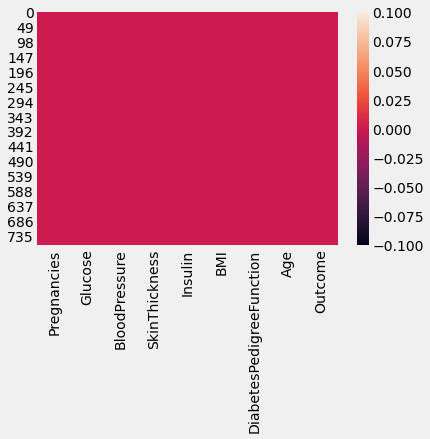

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

Something is off. As you can see above, more than one columns has 0 as 'Insulin' value. Also, we have 0 as 'SkinThickness' value. It is not possible for value like BMI, Blood pressure or Skinthickness.

Let's check how many zeros we have:

In [ ]:
bp_zeros = dataset[dataset['BloodPressure'] == 0].shape[0]
st_zeros = dataset[dataset['SkinThickness'] == 0].shape[0]
glucos_zeros = dataset[dataset['Glucose'] == 0].shape[0]
bmi_zeros = dataset[dataset['BMI'] == 0].shape[0]
insulin_zeros = dataset[dataset['Insulin'] == 0].shape[0]
print(f"Number of zeros 'BloodPressure' column have : {bp_zeros}")
print(f"Number of zeros 'SkinThickness' column have : {st_zeros}")
print(f"Number of zeros 'Glucose' column have : {glucos_zeros}")
print(f"Number of zeros 'BMI' column have : {bmi_zeros}")
print(f"Number of zeros 'Insulin' column have : {insulin_zeros}")

Number of zeros 'BloodPressure' column have : 35
Number of zeros 'SkinThickness' column have : 227
Number of zeros 'Glucos' column have : 5
Number of zeros 'BMI' column have : 11
Number of zeros 'Insulin' column have : 374


Slightly more than half of the insulin column has zero as value.

**Histograms**

Histogram shows us the frequency distribution of a variable. It partitions the spread of numeric data into parts called as “bins” and then counts the number of data points that fall into each bin

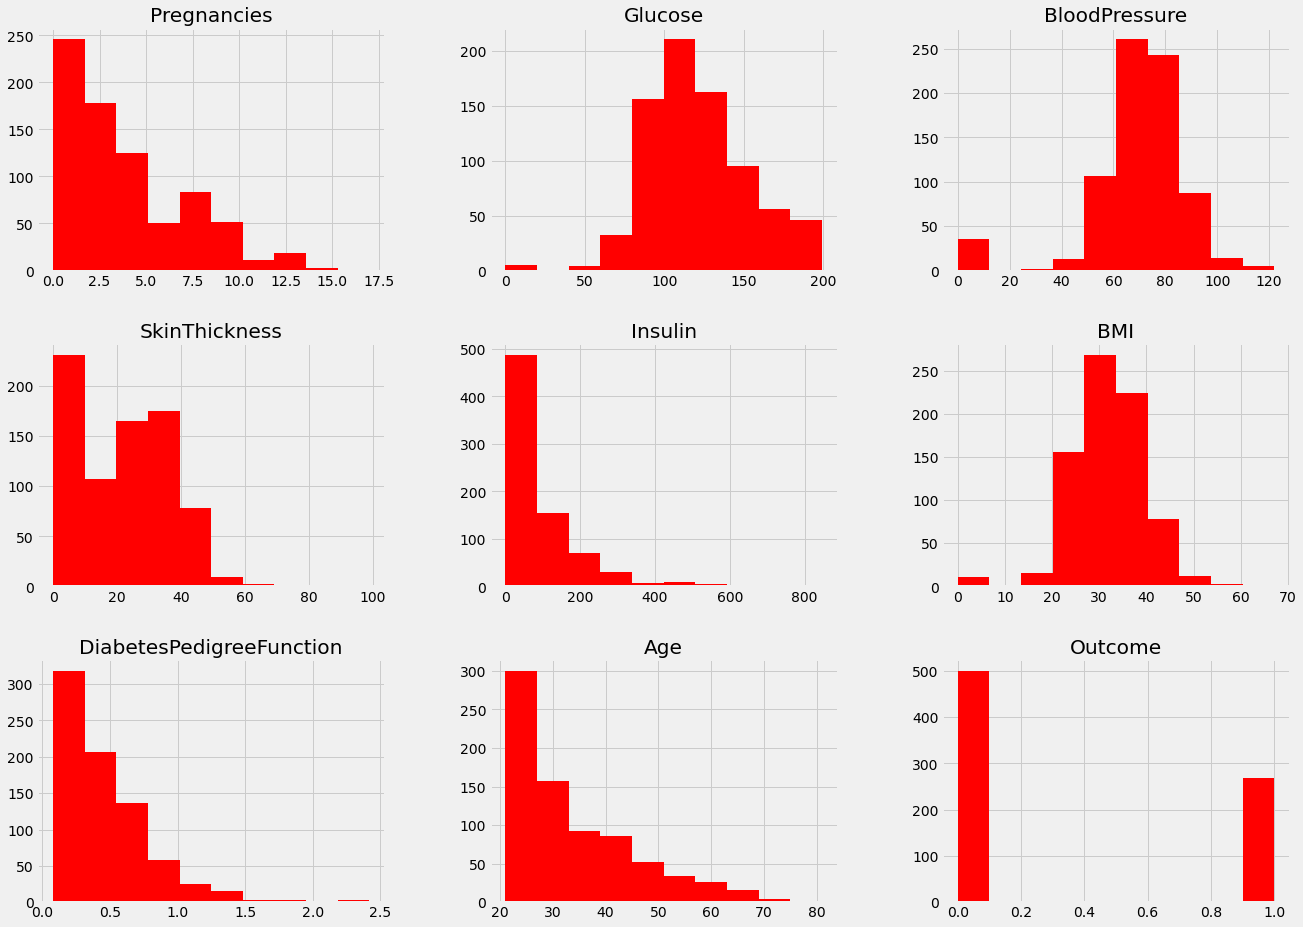

In [ ]:
dataset.hist(color='red', figsize=(20,15));

SkinThickness, Insulin is right skewed.

BMI, and BloodPressure is normally distributed.

Glucose is left skewed.

**FEATURE ENGINEERING**

*Standardization*

As it is normally distributed like BMI, and BloodPressure. If we fill zeros with median of that columns, we wouldn't disrupt the data.

For left, and right skewed data, we can fill zeros with median of that columns.

In [ ]:
data_2 = dataset.copy()

In [ ]:
data_2['Insulin'].replace(0, data_2['Insulin'].median(), inplace=True)
data_2['SkinThickness'].replace(0, data_2['SkinThickness'].median(), inplace=True)
data_2['BMI'].replace(0, data_2['BMI'].mean(), inplace=True)
data_2['Glucose'].replace(0, data_2['Glucose'].median(), inplace=True)
data_2['BloodPressure'].replace(0, data_2['BloodPressure'].mean(), inplace=True)

In [ ]:
data_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,30.5,33.6,0.627,50,1
1,1,85,66.0,29,30.5,26.6,0.351,31,0
2,8,183,64.0,23,30.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [ ]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Correlation**

Now, we can check the correlations using an heatmap.

In [ ]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

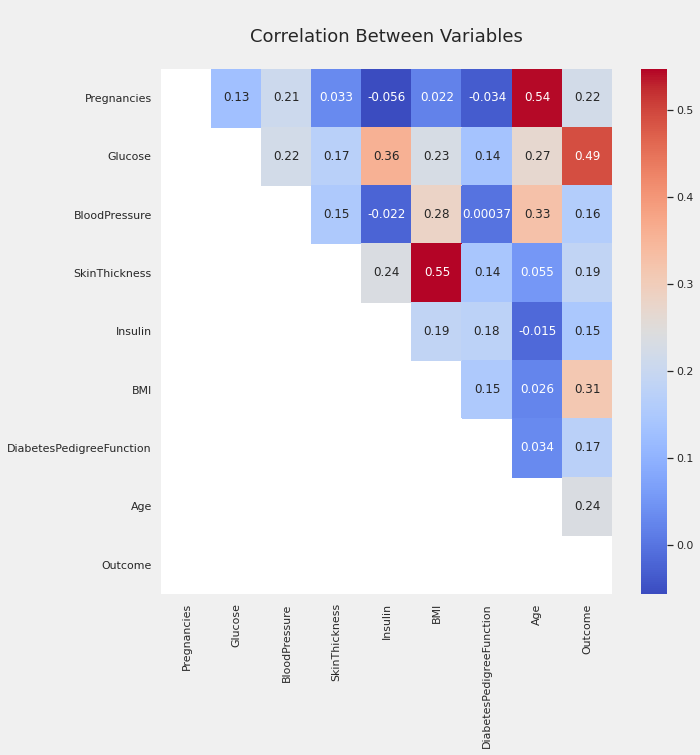

In [ ]:
half_corr_heatmap(data_2, 'Correlation Between Variables')

There is no high correlation between variables.
So let's try to identify how each feature is correlated with the outcome (0,1).

In [ ]:
def corr_to_target(dataframe, target, title=None, file=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

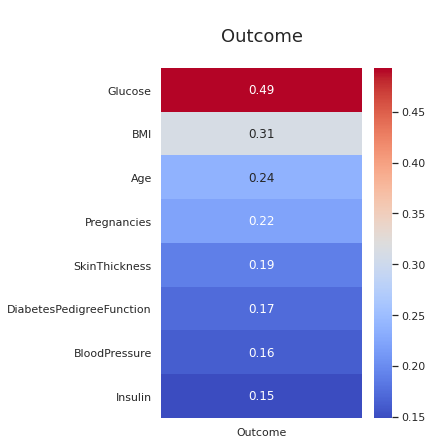

In [ ]:
corr_to_target(data_2, 'Outcome', 'Outcome');

As we can see below, Glucose is highly correlated with outcome, followed by BMI and Age.

**Handling Outliers**

Let's create boxplots for all variables in dataframe, in order to detect outliers.

In [ ]:
def gen_boxplots(dataframe, cols=1, file=None):
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nBoxplots for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return

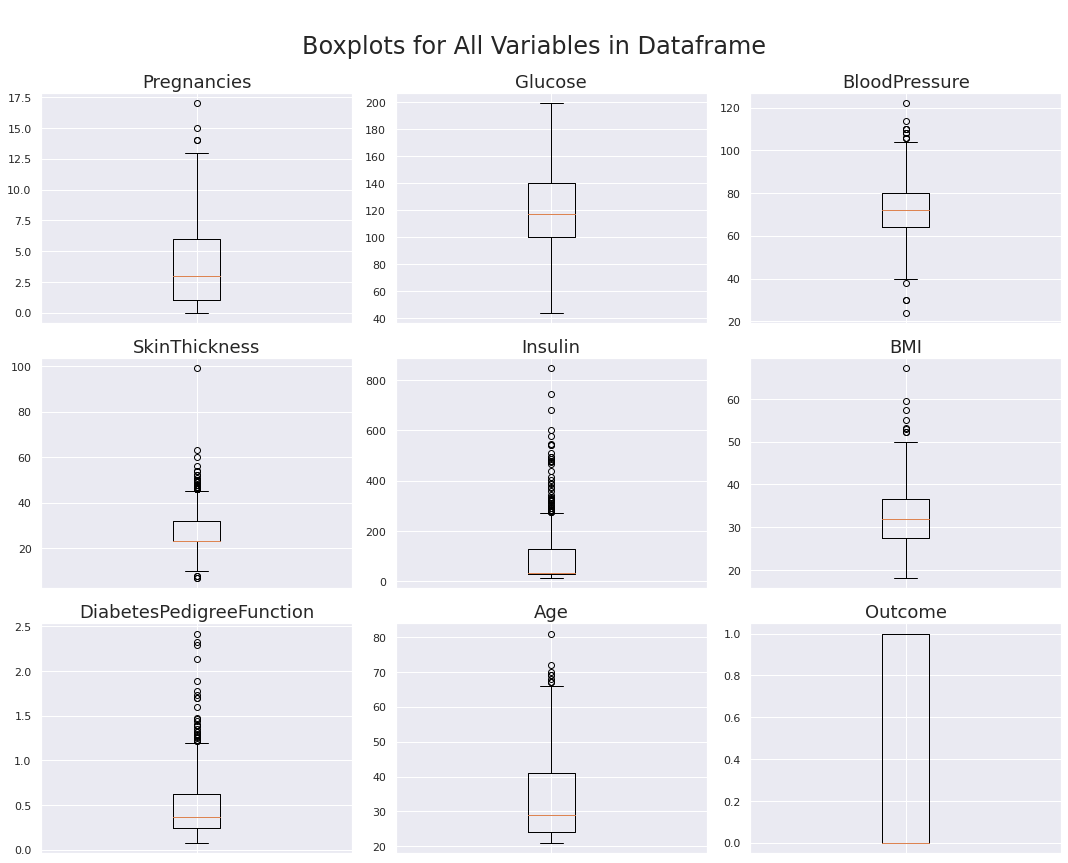

In [ ]:
import math
gen_boxplots(data_2, 3);

Insulin, DiabetesPedigreeFunction, BMI, SkinThickness all have outliers.

In [ ]:
data_2.groupby('Outcome')[['BMI', 'Age', 'Insulin', 'Pregnancies']].agg(['min', 'max', 'mean'])

BMI                  Age  ...     Insulin Pregnancies              
          min   max       mean min  ...        mean         min max      mean
Outcome                             ...                                      
0        18.2  57.3  30.880066  21  ...   83.188000           0  13  3.298000
1        22.9  67.1  35.381288  21  ...  116.041045           0  17  4.865672

[2 rows x 12 columns]

BMI should be between 30, and 34.9, to be classified as obese. Greater than 35 shows that we have extreme obeseity. As we see above, mean of the BMI values shows us that excess weight can cause diabetes.
With age mean, which 37 is very young, means that high weight, and young age with diabetes is in the majority in this data.
Someone has 13, and 17 children which is incredible. Since, we do not know how many of them has children with that amount, we cannot decide whether this is decisive for them to being diabetes. But, average number of children across two possibilities is low.

Now let's focus on DiabetesPedigreeFunction: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

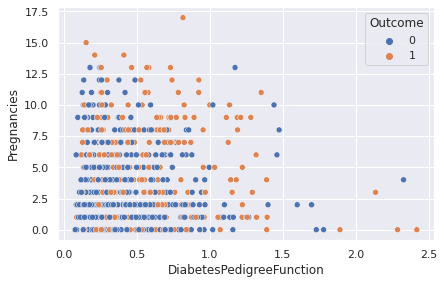

In [ ]:
sns.scatterplot(data = data_2, x = 'DiabetesPedigreeFunction', y = 'Pregnancies', hue = 'Outcome');

**Numerical Column Grouping**

In [ ]:
data_2.groupby('Pregnancies').Pregnancies.count()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

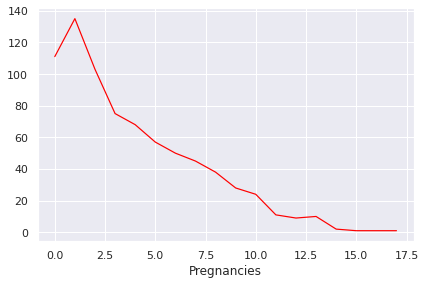

In [ ]:
data_2.groupby('Pregnancies').size().plot(kind = 'line', color = 'red', linewidth = 1.2);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


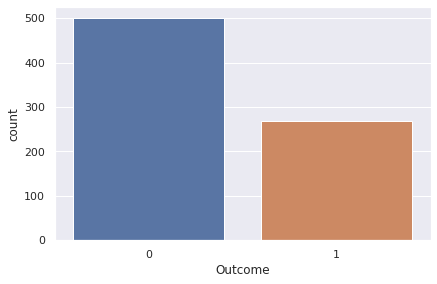

In [ ]:
sns.countplot(data_2['Outcome']);

**Removing outliers**

In [ ]:
Q1 = data_2.quantile(0.25)
Q2 = data_2.quantile(0.75)
IQR = Q2 - Q1
IQR

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64

In [ ]:
data2_out = data_2[~((data_2 < (Q1 - 1.5 * IQR)) |(data_2 > (Q2 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data2_out.shape

(636, 9)

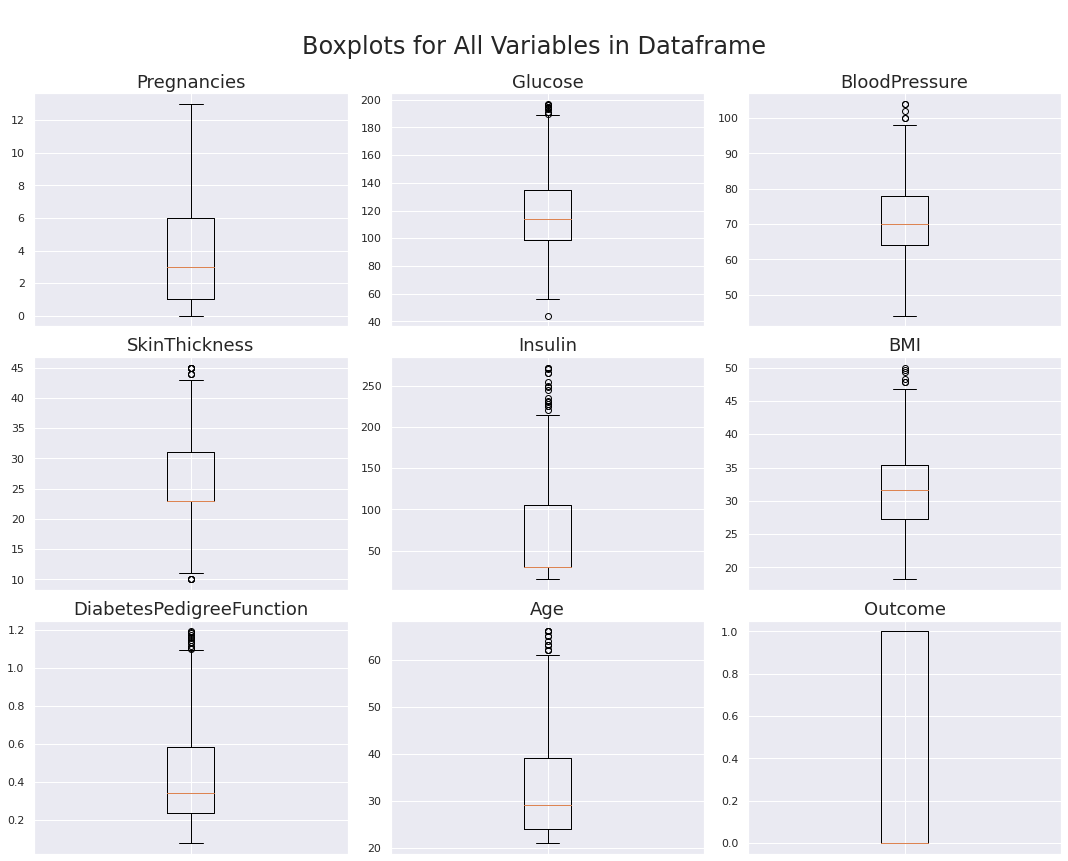

In [ ]:
gen_boxplots(data2_out,3)

Now let's use scatterplots and histograms for the two outcomes:

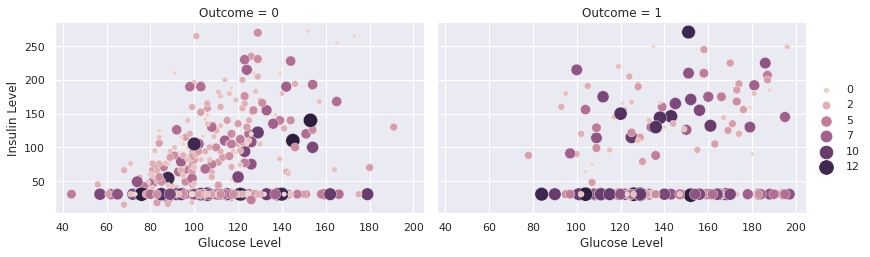

In [ ]:
g = sns.FacetGrid(data2_out, col="Outcome", height=3.5, aspect=1.6)
g.map_dataframe(sns.scatterplot, x="Glucose", y="Insulin", hue="Pregnancies", size = 'Pregnancies', sizes=(20, 200))
g.set_axis_labels("Glucose Level", "Insulin Level")
g.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


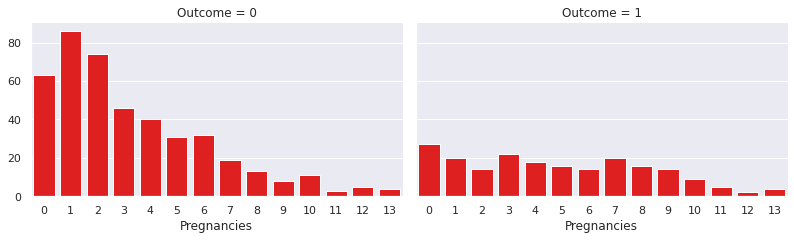

In [ ]:
g2 = sns.FacetGrid(data2_out, col="Outcome", height=3.5, aspect=1.6)
g2.map(sns.countplot, "Pregnancies", color = 'red');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


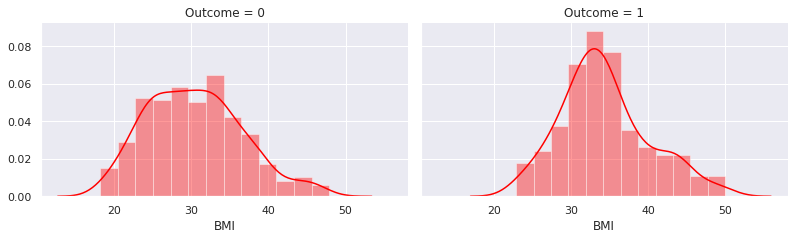

In [ ]:
g3 = sns.FacetGrid(data2_out, col="Outcome", height=3.5, aspect=1.6)
g3.map(sns.distplot, "BMI", color = 'red');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


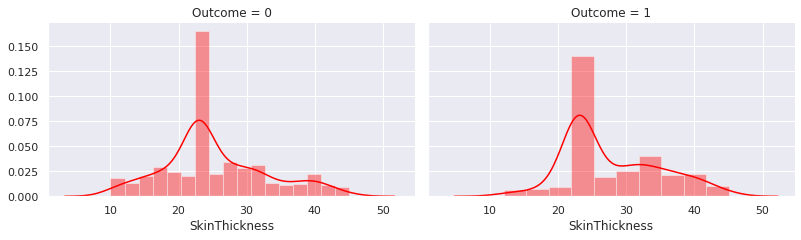

In [ ]:
g4 = sns.FacetGrid(data2_out, col="Outcome", height=3.5, aspect=1.6)
g4.map(sns.distplot, "SkinThickness", color = 'red');

Let's gather all together to get the big picture

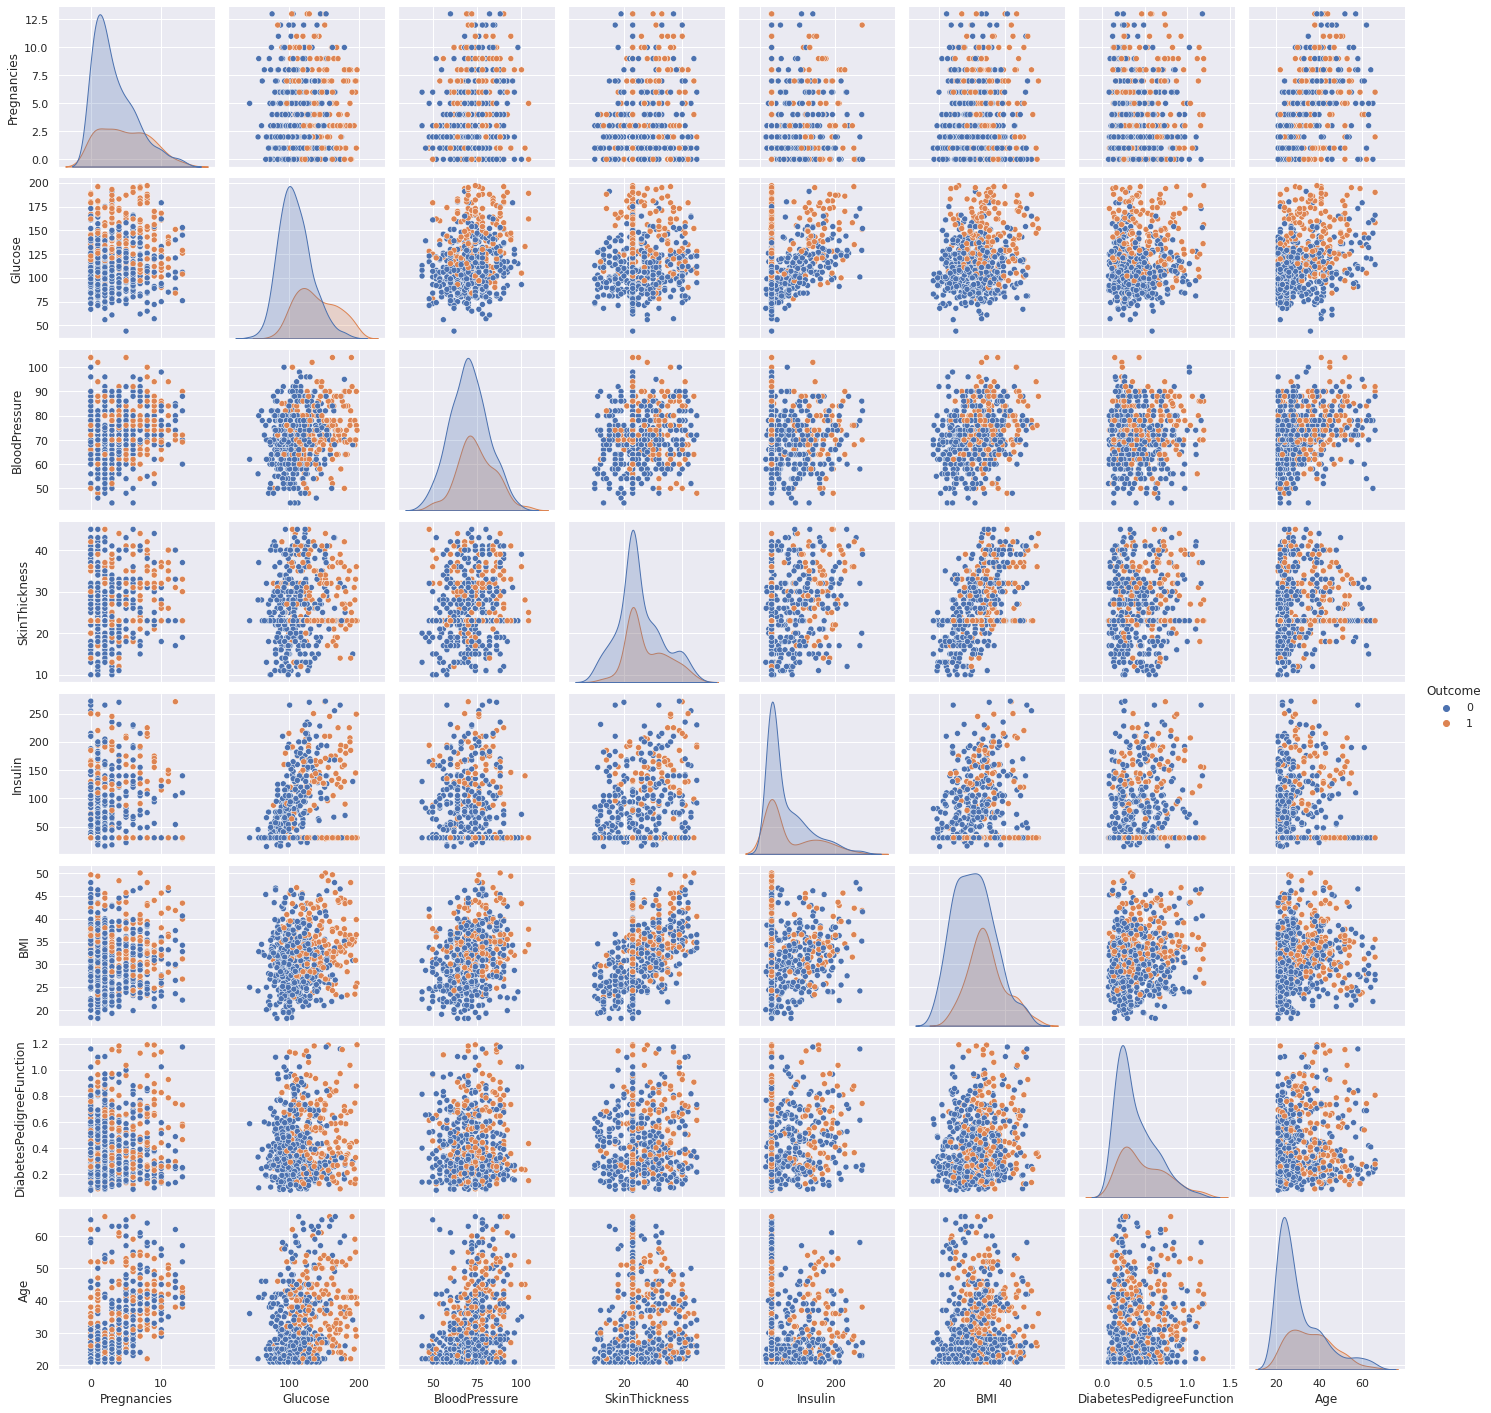

In [ ]:
import seaborn as sns
sns.pairplot(data = data2_out, hue = 'Outcome');

**MODEL BUILDING**

In [ ]:
x=dataset.iloc[:,: -1]
y=dataset.iloc[:,-1]

**Data splitting**

Here the data set has been divided into train and test data set. The test data set size is 33% of the total records. This test data will not be used in model training and work as an independent test data.

In [ ]:
X = data2_out.drop('Outcome', axis = 1)
y = data2_out['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 0)

**StandardScaler**

StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, in order to standardize the range of functionality of the input dataset. StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

***LOGISTIC REGRESSION***

Logistic regression is useful for situations in which you want to be able to predict the presence or absence of a characteristic or outcome based on values of a set of predictor variables. It is similar to a linear regression model but is suited to models where the dependent variable is dichotomous. Logistic regression coefficients can be used to estimate odds ratios for each of the independent variables in the model. Logistic regression is applicable to a broader range of research situations than discriminant analysis.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_sc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_test_sc)

**Evaluation Metrics for Classification:**
**Accuracy Value**

In [ ]:
print(lr.score(X_test_sc,y_test))

0.7714285714285715


See that the model has 77% accuracy which is pretty good.
If you want to improve this accuracy, logistic regression contains many hyperparameters that you can tune to improve it.

**Hypermapameter optimization**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[125  19]
 [ 29  37]]


*Precision and Recall*

Recall: Gives information about how much we have predicted correctly for a real positive class.
Precision: Gives information about how much positive class we have predicted as positive are actually positive.

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision score:",precision_score(y_test, pred))
print("Recall score:",recall_score(y_test, pred))

Precision score: 0.6607142857142857
Recall score: 0.5606060606060606


*Roc_Auc_Score*

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier across different threshold values.

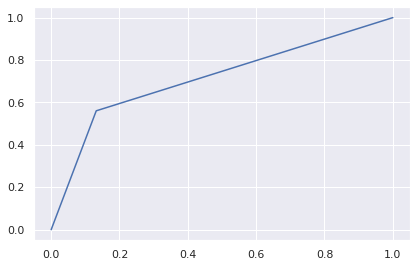

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = lr.predict_proba(X_test_sc)[::,1]
fpr, tpr, _ = roc_curve(y_test,  pred)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))

*GridSearchCV*

GridSearchCV implements the most obvious way of finding an optimal value for anything — it simply tries all the possible values (that you pass) one at a time and returns which one yielded the best model results, based on the scoring that you want, such as accuracy on the test set.

In [ ]:
gscv = GridSearchCV(LogisticRegression(solver='liblinear', multi_class = 'auto'), 
                    {'C' : [1, 10, 20]}, 
                    cv = 5, return_train_score=False)
gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gscv.best_params_

{'C': 10}

*Model Tuning*

Fine tuning machine learning predictive model is a crucial step to improve accuracy of the forecasted results.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
log = LogisticRegression(C = 10)
log.fit(X_train_sc, y_train)
log_y_pred = log.predict(X_test_sc)
log_y_pred_train = log.predict(X_train_sc)

In [ ]:
log_as = accuracy_score(y_test, log_y_pred)
log_as_train = accuracy_score(log_y_pred_train, y_train)
log_as_train

0.7863849765258216

In [ ]:
log_as

0.7714285714285715

In [ ]:
print(classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       154
           1       0.56      0.66      0.61        56

    accuracy                           0.77       210
   macro avg       0.71      0.74      0.72       210
weighted avg       0.79      0.77      0.78       210



In [ ]:
print(f"Logistic Regression model accuracy score for test data : {log_as}")
print(f"Logistic Regression model accuracy score for train data : {log_as_train}\n")

Logistic Regression model accuracy score for test data : 0.7714285714285715
Logistic Regression model accuracy score for train data : 0.7863849765258216



***ADDING POLYNOMIAL EFFECT***

Polynomial regression also a type of linear regression is often used to make predictions using polynomial powers of the independent variables.
In the case of simple linear regression, there is some data that is above or below the line and thus it’s not accurate. This is where polynomial regression can be used.

*Preprocessing Data*

This is the additional step we apply to polynomial regression, where we add the feature 𝑥² to our Model.

First we need to convert your data to polynomial features. Originally, our data has 8 columns.

In [ ]:
X_train_sc.shape

(426, 8)

We create the polynomial features with scikit learn (here it is for degree 2):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train_sc)
X_poly.shape

(426, 44)

We know have 44 features. 

On this you can now build your logistic regression calling X_poly.

In [ ]:
lr = LogisticRegression()
lr.fit(X_poly,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We evaluate your model on the test data.

In [ ]:
lr.score(poly.transform(X_test_sc), y_test)

0.7142857142857143

As we can see, polynomial regression diminished the accuracy score at 71%.

**L1 and L2 REGULARIZATION**

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

*Ridge Regression*

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) 

In [ ]:
rr.fit(X_train_sc, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train_sc, y_train)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
Ridge_train_score = rr.score(X_train_sc,y_train)
Ridge_test_score = rr.score(X_test_sc, y_test)
Ridge_train_score100 = rr100.score(X_train_sc,y_train)
Ridge_test_score100 = rr100.score(X_test_sc, y_test)

In [ ]:
print(f"Ridge score for train data : {Ridge_train_score}")
print(f"Ridge score for test data : {Ridge_test_score}")
print(f"Ridge score for train data 100 : {Ridge_train_score100}")
print(f"Ridge score for test data 100: {Ridge_test_score100}")

Ridge score for train data : 0.32739266325279504
Ridge score for test data : 0.28166081559417033
Ridge score for train data 100 : 0.3189075235653608
Ridge score for test data 100: 0.2740641555375172


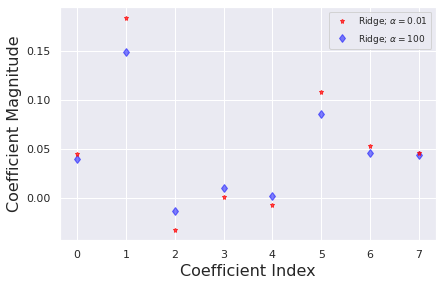

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=9, loc=0)
plt.show()

**Lasso regression** 

It not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (lambda) can be controlled and we will see the effect below.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [ ]:
print ("training score:", train_score)
print ("test score:", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

training score: 0.22733149000201391
test score: 0.24839688835662663
number of features used:  1


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [ ]:
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha=0.01: ", test_score001)
print ("number of features used: for alpha=0.01:", coeff_used001)

training score for alpha=0.01: 0.3192251013667965
test score for alpha=0.01:  0.2618305255442086
number of features used: for alpha=0.01: 8


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [ ]:
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.3273918437739026
test score for alpha =0.0001:  0.2815423793258256
number of features used: for alpha =0.0001: 8


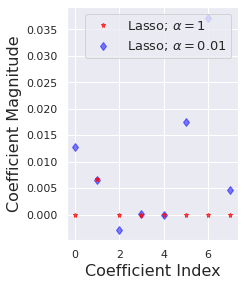

In [ ]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)

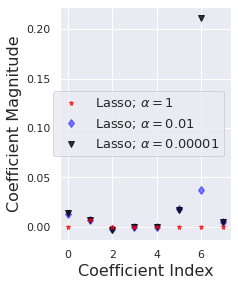

In [ ]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)


Let’s understand the plot and the code in a short summary.

The default value of regularization parameter in Lasso regression (given by α) is 1.

With this, out of 8 features in cancer data-set, only 1 feature is used (non zero value of the coefficient).

Both training and test score (with only 1 feature) are low; conclude that the model is under-fitting the diabetes data-set.

Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =8, training and test score increases.

Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.

Further reduce α =0.0001, non-zero features = 8. Training and test scores are always fairly low compared to basic logistic regression.
